### This notebook contains skeleton code, and discusses some ideas on how to approach the problem of designing a robot control architecuture using BLE.

# A Robot Control Class
Classes provide a means of bundling data and functionality together. It helps organize your thoughts and your code. 

Below is the skeleton of one possible class structure to deal with robot communication. You do not have to use the exact same structure, it merely serves as a reference.

In [5]:
from matplotlib import pyplot as plt
import numpy as np

class RobotControl():
    # Initialize Function
    def __init__(self, ble):
        self.ble = ble
        
        # A variable to store the latest sensor value
        self.latest_tof_front_reading = None
        
        # A list to store the history of all the sensor values
        # Each item in the list is a tuple (value, time)
        # WARNING: The list could grow really fast; you need to deal with this accordingly.

        
        # A variable to store the latest imu reading
        self.latest_imu_reading = None
        
        self.feature_ind = 0
        
        self.ARR_SIZE = 100
        self.feature_names_list = ["TOF Readings", "Time Stamps", "Motor Percentages"]
        self.data_list = [ [] for _ in range(len(self.feature_names_list))]
        
        # Activate notifications (if required)
        self.setup_notify()
            
    # A function to activate various notifications (if required)
    def setup_notify(self):
        # Code to setup various notify events
        # Ex:
        ble.start_notify(ble.uuid['RX_FLOAT'], self.pid_data_callback_handler)
        
    def print_data(self):
        for i, feature in enumerate(self.data_list):
            print(self.feature_names_list[i])
            for d in feature:
                print (str(d))

    def plot_data(self):
        fig, (ax1, ax2) = plt.subplots(2, sharex=True)

        fig.suptitle('PID outputs')

        ax1.set_ylabel('Motor Output (%)')

        ax1.plot(self.data_list[1], self.data_list[2])

        ax2.plot(self.data_list[1],self.data_list[0])

        ax2.set_xlabel('time (ms)')

        ax2.set_ylabel('TOF Reading (mm)')

        plt.show()
    # An example function callback handler for storing the history of the tof sensor
    # Your callback handlers should perform minimal processing!
    # Do not add a receive_* function inside the callback handler, it defeats the purpose of BLE notify
    def pid_data_callback_handler(self, uuid, byte_arr):
        # Append a tuple (value, time) to a list
        fl = ble.bytearray_to_float(byte_arr)
        # print(str(fl))
        if len(self.data_list[self.feature_ind]) < self.ARR_SIZE:
            self.data_list[self.feature_ind].append(fl)
        elif self.feature_ind < len(self.feature_names_list)-1:
            self.feature_ind = self.feature_ind + 1
            self.data_list[self.feature_ind].append(fl)
        else: print("unexpected data")
        
        if self.feature_ind == len(self.feature_names_list)-1 and len(self.data_list[self.feature_ind]) == self.ARR_SIZE - 1:
            print("done recieving")

    
    # An example function to fetch the front TOF sensor reading
    # Here we assume RX_TOF1 is a valid UUID defined in connection.yaml and
    # in the Arduino code as well
    def get_front_tof(self):
        self.latest_tof_front_reading = self.ble.receive_float(self.ble.uuid['RX_TOF1'])
        pass
    
    # An example function to fetch the IMU readings as a string
    # Here we assume RX_IMU is a valid UUID defined in connection.yaml and
    # in the Arduino code as well
    def get_imu(self):
        self.latest_imu_reading = self.ble.receive_string(self.ble.uuid['RX_IMU'])
        pass
    
    # A function to instruct the robot to stop 300mm from wall
    def wall_pid(self):
        ble.send_command(CMD.WALL_PID,0)
    
    
    # A function to instruct the robot to move forward
    def move_forward(self, speed):
        # Code to move forward
        ble.send_command(CMD.MOVE_FORWARD, speed)
    
    # A function to stop robot motion
    def stop(self):
        # Code to stop robot motion
        ble.send_command(CMD.STOP)
        
    # def setKP


### You can now use such a class to control your robot

## Setup:

In [ ]:
# ARR_SIZE = 100
# feature_names_list = ["TOF Readings", "Time Stamps", "Motor Percentages"]
# data_list = [ [] for _ in range(len(feature_names_list))]

# feature_ind = 0

# def data_receiver(uuid, byte_arr):
#     global feature_ind
#     global data_list
#     fl = ble.bytearray_to_float(byte_arr)
#     print(str(fl))
#     if len(data_list[feature_ind]) < ARR_SIZE:
#         data_list[feature_ind].append(fl)
#     elif feature_ind < len(feature_names_list)-1:
#         feature_ind = feature_ind + 1
#         data_list[feature_ind].append(fl)
#     else: print("unexpected data")
        

    

# RC setup:

In [6]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import asyncio


LOG.propagate = False


# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

# Instantiate RobotControl class
rc = RobotControl(ble)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2022-04-13 17:40:14,885 | INFO     |: Already connected to a BLE device


# PID execution:

In [4]:
rc.wall_pid()

# STEP RESPONSE execution:

In [7]:
rc.move_forward(90)

done recieving


Data output:
TOF Readings
2901.0
2818.0
2962.0
2882.0
2930.0
2922.0
2942.0
2893.0
2972.0
2943.0
2805.0
2908.0
2947.0
2962.0
2948.0
2939.0
2857.0
2978.0
2876.0
2965.0
2916.0
2938.0
2897.0
2752.0
2606.0
2136.0
2071.0
1790.0
1622.0
1469.0
1306.0
1135.0
962.0
790.0
601.0
412.0
214.0
32.0
79.0
189.0
230.0
268.0
298.0
297.0
274.0
229.0
173.0
132.0
108.0
113.0
115.0
113.0
113.0
114.0
113.0
113.0
113.0
112.0
113.0
112.0
113.0
112.0
114.0
113.0
114.0
113.0
113.0
113.0
113.0
113.0
112.0
114.0
114.0
112.0
115.0
113.0
112.0
114.0
112.0
114.0
113.0
115.0
115.0
116.0
114.0
114.0
113.0
113.0
115.0
112.0
112.0
112.0
113.0
113.0
113.0
115.0
113.0
115.0
113.0
114.0
Time Stamps
61561.0
61574.0
61677.0
61773.0
61873.0
61972.0
62072.0
62168.0
62267.0
62367.0
62463.0
62563.0
62662.0
62761.0
62861.0
62957.0
63061.0
63155.0
63255.0
63354.0
63412.0
63510.0
63610.0
63706.0
63806.0
63906.0
64006.0
64102.0
64202.0
64301.0
64402.0
64497.0
64598.0
64696.0
64796.0
64892.0
64992.0
65092.0
65190.0
65291.0
65389.0
6548

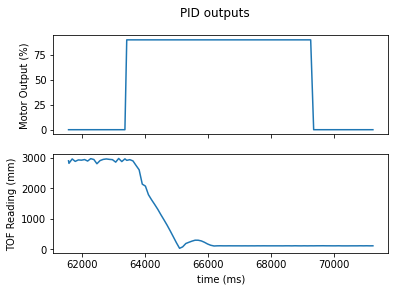

2022-04-13 17:43:40,013 | INFO     |: Disconnected from c0:b3:44:88:00:08


In [8]:
print("Data output:")
rc.print_data();
rc.plot_data();

<hr>

### There are two possible approaches to reading values from the Artemis board
**Approach 1:** Read values explicitly <br>
**Approach 2:** Notifications

#### You can use a combination of both i.e read some values explicitly and activate notifications for others.

## Approach 1: Read values explicitly
Below is a possible structure to run your robot commands in a loop and explicitly read the sensor values as required. 

You have more control of your code in this approach. However, the read functions could perform slower in comparison to notify events.

In [ ]:
# Add this to the top most cell containing the imports
import asyncio


while True:
    ###### Your code ######
    # Ex: Move the robot for 1 sec
    # rc.move_forward(50)
    # await asyncio.sleep(1)
    # rc.stop()
    
    ###### Read values ######
    # rc.get_imu()
    # rc.get_front_tof()

## Approach 2: Notifications
Below is a possible structure to run your robot command in a loop and utilize the notify events. 

You may have to tweak the sleep time based on how you program your arduino, system OS, system specs, system load and, the number and frequency of notify events. 

However, you **don't have to worry too much** about this if you keep your notify callback functions light. It becomes an issue only when you have a large number of notify events within a (very) short duration of time.

In [ ]:
while True:
    ###### Your code ######
    # Ex: Move the robot for 1 sec
    # rc.move_forward(50)
    # await asyncio.sleep(1)
    # rc.stop()
    
    # Process notify events
    # Sleep the current execution so that the notify callback functions can run
    # The sleep time can be much smaller, but it depends on the OS, hardware specs, number of notify events and the system load
    await asyncio.sleep(0.1)